Задание ДЗ 2
Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .
Оцените ошибку модели из п.1 .
Сделайте вывод о том, как изменилась ошибка модели по значениям h.


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [28]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [29]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

b_ar_exp_1 = exponential_smoothing(data['PJME_MW'], 0.01)

Text(0.5, 1.0, 'PJME')

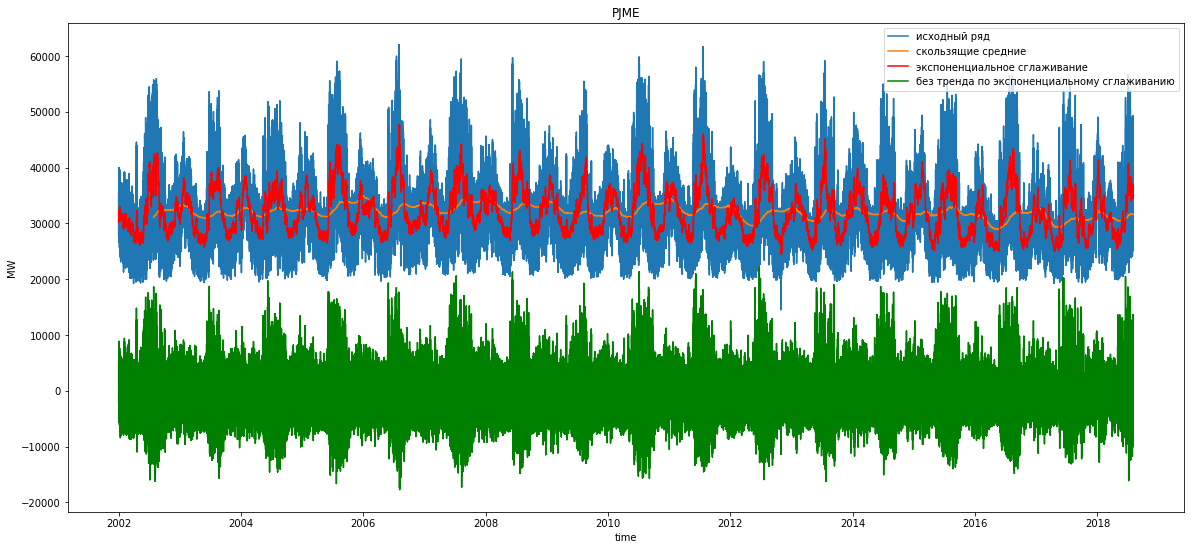

In [30]:
N2 = 24*7*30

plt.figure(figsize=(20, 9))
plt.plot(data.index, data['PJME_MW'], label='исходный ряд')
plt.plot(data['PJME_MW'].rolling(window=N2).mean(), label="скользящие средние");

plt.plot(data.index,b_ar_exp_1, color = 'red', label="экспоненциальное сглаживание");
plt.plot(data.index, data['PJME_MW'] - b_ar_exp_1, color = 'green', label="без тренда по экспоненциальному сглаживанию");
plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME')

In [31]:
df= pd.DataFrame(b_ar_exp_1)
# добавили историю на глубину 3 измерения от текущего (р=3)
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values
df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
# добавим разности - 1-й порядок
df['diff1'] = 0
df['diff1'].iloc[1:] = df.iloc[:-1,0]-df.iloc[1:,0]


df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
0,30393.000000,0.000000,0.0000,0.00,30393.000000,30393.000000,30393.000000,0.0
1,30381.720000,30393.000000,0.0000,0.00,30392.887200,30392.661600,30392.097600,0.0
2,30361.472800,30381.720000,30393.0000,0.00,30392.573056,30391.725936,30389.647616,0.0
3,30336.848072,30361.472800,30381.7200,30393.00,30392.015806,30390.079600,30385.423652,0.0
4,30314.049591,30336.848072,30361.4728,30381.72,30391.236144,30387.798700,30379.713728,0.0


In [32]:
df.index = data.index

In [33]:
df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,30393.000000,0.000000,0.0000,0.00,30393.000000,30393.000000,30393.000000,0.0
2002-01-01,30381.720000,30393.000000,0.0000,0.00,30392.887200,30392.661600,30392.097600,0.0
2002-01-01,30361.472800,30381.720000,30393.0000,0.00,30392.573056,30391.725936,30389.647616,0.0
2002-01-01,30336.848072,30361.472800,30381.7200,30393.00,30392.015806,30390.079600,30385.423652,0.0
2002-01-01,30314.049591,30336.848072,30361.4728,30381.72,30391.236144,30387.798700,30379.713728,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 8 columns):
0           145374 non-null float64
t           145374 non-null float64
t1          145374 non-null float64
t2          145374 non-null float64
exp_0_01    145374 non-null float64
exp_0_03    145374 non-null float64
exp_0_08    145374 non-null float64
diff1       145373 non-null float64
dtypes: float64(8)
memory usage: 15.0 MB


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
scl =StandardScaler()
scly =StandardScaler()

# сделаем примеры и модель 
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_mw, test_mw = split_data_b( df, '01-01-2017')

X_train_mw = train_mw.iloc[:-1,:]
y_train_mw = train_mw[df.columns[0]].values[1:]
X_test_mw = test_mw.iloc[:-1,:]
y_test_mw = test_mw[df.columns[0]].values[1:]

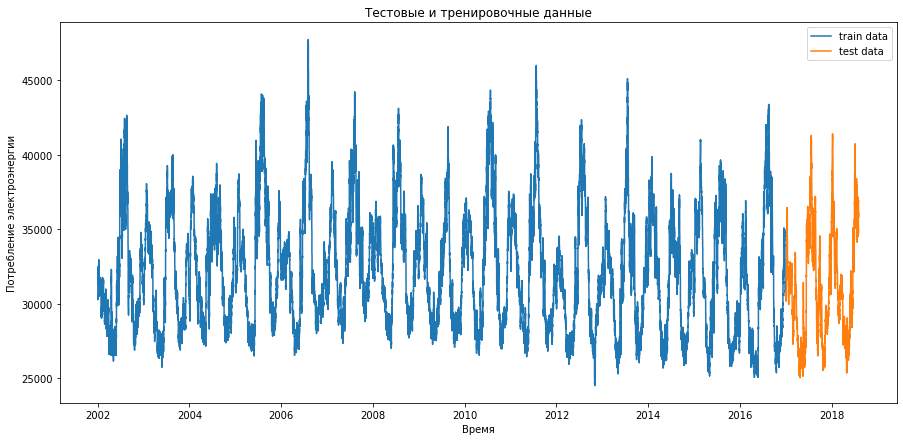

In [39]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление электроэнергии')
plt.plot(train_mw.index.get_level_values('Date'),train_mw[df.columns[0]], label='train data' )
plt.plot(test_mw.index.get_level_values('Date'),test_mw[df.columns[0]], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
model_gb.fit( X_train_mw, y_train_mw ) 
X_test_pred_gb = model_gb.predict(X_test_mw)

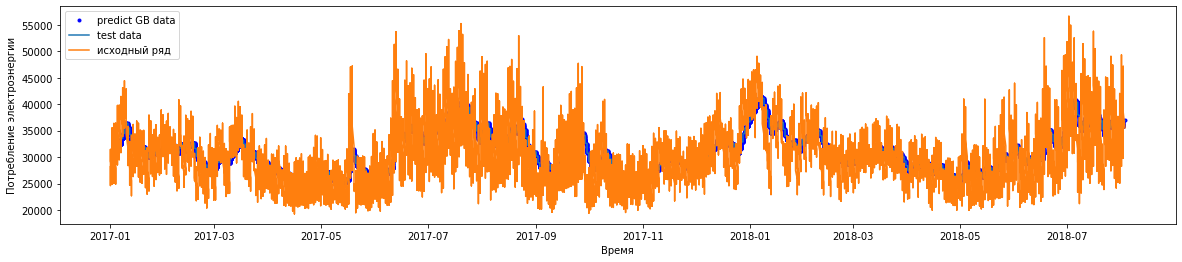

ошибка градиентного бустинга :   0.035565160275632425 %


In [48]:
plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление электроэнергии')
plt.plot(test_mw.index[1:],X_test_pred_gb, '.b', label='predict GB data' )
plt.plot(test_mw.index[1:],y_test_mw, label='test data')
plt.plot(data.loc['2017-01-01':].index, data.loc['2017-01-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_mw, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

In [51]:
h=10
X_train_mw = train_mw.iloc[:-h,:]
y_train_mw = train_mw[df.columns[0]].values[h:]
X_test_mw = test_mw.iloc[:-h,:]
y_test_mw = test_mw[df.columns[0]].values[h:]

model_gb.fit( X_train_mw, y_train_mw ) 
X_test_pred_gb = model_gb.predict(X_test_mw)



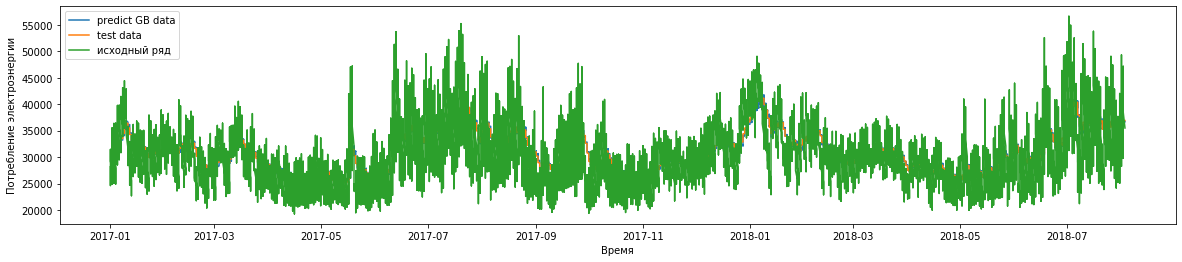

ошибка градиентного бустинга :   0.9099106697440528 %


In [52]:
plt.figure( figsize=( 20, 4 ))

plt.xlabel('Время')
plt.ylabel('Потребление электроэнергии')
plt.plot(test_mw.index[h:],X_test_pred_gb, label='predict GB data' )
plt.plot(test_mw.index[h:],y_test_mw, label='test data')
plt.plot(data.loc['2017-01-01':].index, data.loc['2017-01-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test_mw, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга :  ', er_g, '%')

ошибка несколько выросла, но все равно составляет небольшую величину - менее 1%

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):
а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени

а) температура за окном - имеет циклы в течение дня, сезона, года, кроме того имеется тренд (глобальное потепление)

б) количество денег, которые тратят покупатели интернет магазина - в зависимости от типа товара может быть цикличность, сезонность, а также цикличность, связанная с праздниками. должен быть тренд, если магазин развивается

в) вес растущего котенка - имеет цикличность внутри дня (в зависимости от приема пищи), тренд - повышательный до момента достижения "взрослого" состояния

г) прирост объема деревьев в лесу - имеет цикличность в зависимости от сезона, тренд - повышательный в связи с размножением деревьев